In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [46]:
name_list=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','CLASS']

In [47]:
train=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data",sep=',',names=name_list)
test=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data",sep=',',names=name_list)

In [48]:
train.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [49]:
test.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


/Users/bruce/anaconda/lib/python2.7/site-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/Users/bruce/anaconda/lib/python2.7/site-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/Users/bruce/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/bruce/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


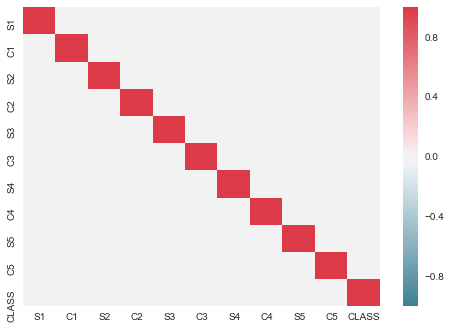

In [50]:
corr=train[train.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap)
sns.plt.show()

In [51]:
print(train.shape)
print(test.shape)

(25010, 11)
(1000000, 11)


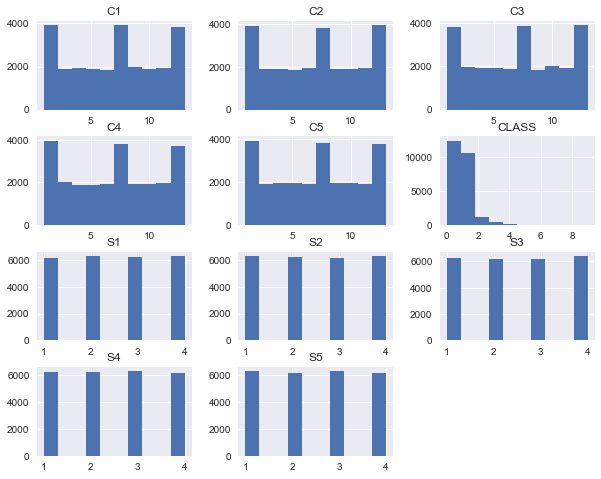

In [52]:
train.hist(figsize=(10,8))
plt.show()

In [53]:
dummies_S1=pd.get_dummies(train['S1'],prefix='S1')
dummies_S2= pd.get_dummies(train['S2'], prefix= 'S2') 
dummies_S3 = pd.get_dummies(train['S3'], prefix= 'S3')
dummies_S4 = pd.get_dummies(train['S4'], prefix= 'S4')
dummies_S5 = pd.get_dummies(train['S5'], prefix='S5')
train = pd.concat([train,dummies_S1, dummies_S2, dummies_S3, dummies_S4, dummies_S5], axis=1)
train = train.drop(['S1','S2','S3','S4','S5'], axis=1)

train.head()

,C1,C2,C3,C4,C5,CLASS,S1_1,S1_2,S1_3,S1_4,...,S3_3,S3_4,S4_1,S4_2,S4_3,S4_4,S5_1,S5_2,S5_3,S5_4
0,10,11,13,12,1,9,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,11,13,10,12,1,9,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,12,11,13,10,1,9,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,10,11,1,13,12,9,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1,13,12,11,10,9,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [54]:
dummies_C1=pd.get_dummies(train['C1'],prefix='C1')
dummies_C2= pd.get_dummies(train['C2'], prefix= 'C2') 
dummies_C3 = pd.get_dummies(train['C3'], prefix= 'C3')
dummies_C4 = pd.get_dummies(train['C4'], prefix= 'C4')
dummies_C5 = pd.get_dummies(train['C5'], prefix='C5')
train = pd.concat([train,dummies_C1, dummies_C2, dummies_C3, dummies_C4, dummies_C5], axis=1)
train = train.drop(['C1','C2','C3','C4','C5'], axis=1)

train.head()

,CLASS,S1_1,S1_2,S1_3,S1_4,S2_1,S2_2,S2_3,S2_4,S3_1,...,C5_4,C5_5,C5_6,C5_7,C5_8,C5_9,C5_10,C5_11,C5_12,C5_13
0,9,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,9,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
dummies_S1=pd.get_dummies(test['S1'],prefix='S1')
dummies_S2= pd.get_dummies(test['S2'], prefix= 'S2') 
dummies_S3 = pd.get_dummies(test['S3'], prefix= 'S3')
dummies_S4 = pd.get_dummies(test['S4'], prefix= 'S4')
dummies_S5 = pd.get_dummies(test['S5'], prefix='S5')
test = pd.concat([test,dummies_S1, dummies_S2, dummies_S3, dummies_S4, dummies_S5], axis=1)
test = test.drop(['S1','S2','S3','S4','S5'], axis=1)

test.head()

,C1,C2,C3,C4,C5,CLASS,S1_1,S1_2,S1_3,S1_4,...,S3_3,S3_4,S4_1,S4_2,S4_3,S4_4,S5_1,S5_2,S5_3,S5_4
0,1,13,4,3,12,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,12,2,11,5,5,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,9,6,4,2,9,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,13,13,1,6,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,10,7,2,11,9,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [56]:
dummies_C1=pd.get_dummies(test['C1'],prefix='C1')
dummies_C2= pd.get_dummies(test['C2'], prefix= 'C2') 
dummies_C3 = pd.get_dummies(test['C3'], prefix= 'C3')
dummies_C4 = pd.get_dummies(test['C4'], prefix= 'C4')
dummies_C5 = pd.get_dummies(test['C5'], prefix='C5')
test = pd.concat([test,dummies_C1, dummies_C2, dummies_C3, dummies_C4, dummies_C5], axis=1)
test = test.drop(['C1','C2','C3','C4','C5'], axis=1)

test.head()

,CLASS,S1_1,S1_2,S1_3,S1_4,S2_1,S2_2,S2_3,S2_4,S3_1,...,C5_4,C5_5,C5_6,C5_7,C5_8,C5_9,C5_10,C5_11,C5_12,C5_13
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [57]:
X_train=train.drop("CLASS",axis=1)
Y_train=train["CLASS"].values
X_test=test.drop("CLASS",axis=1)
Y_test=test["CLASS"].values

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
model=RandomForestClassifier(n_estimators=100)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))

Ranom Forest         69.56 (+/-) 1.17 


In [15]:
from sklearn import metrics
from matplotlib import pylab

final_model = RandomForestClassifier(n_estimators=200,max_features=None,bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[501209      0      0      0      0      0      0      0      0      0]
 [358047  64451      0      0      0      0      0      0      0      0]
 [  7626  39996      0      0      0      0      0      0      0      0]
 [ 18506   2615      0      0      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [   121   1303      0      0      0      0      0      0      0      0]
 [   225      5      0      0      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
56.566
             precision    recall  f1-score   support

          0       0.56      1.00      0.72    501209
          1       0.59      0.15      0.24    422498
          2       0.00      0.00      0.00     47622
          3       0.00      0.00      0.00     21

/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[501209      0      0      0      0      0      0      0      0      0]
 [389930  32276    292      0      0      0      0      0      0      0]
 [ 40277   7268     77      0      0      0      0      0      0      0]
 [ 19555    154     10   1389      0      0     13      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [  1190    127      1    106      0      0      0      0      0      0]
 [   218      0      0     12      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
53.4951
             precision    recall  f1-score   support

          0       0.52      1.00      0.69    501209
          1       0.81      0.08      0.14    422498
          2       0.20      0.00      0.00     47622
          3       0.92      0.07      0.12     2

In [17]:
final_model = RandomForestClassifier(n_estimators=200,max_features='sqrt',bootstrap=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[501209      0      0      0      0      0      0      0      0      0]
 [422457     41      0      0      0      0      0      0      0      0]
 [ 47051    571      0      0      0      0      0      0      0      0]
 [ 20263    858      0      0      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [  1169    255      0      0      0      0      0      0      0      0]
 [   169     61      0      0      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
50.125
             precision    recall  f1-score   support

          0       0.50      1.00      0.67    501209
          1       0.02      0.00      0.00    422498
          2       0.00      0.00      0.00     47622
          3       0.00      0.00      0.00     21

In [14]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[501174     35      0      0      0      0      0      0      0      0]
 [122193 300305      0      0      0      0      0      0      0      0]
 [    16  47605      1      0      0      0      0      0      0      0]
 [    87  21027      1      6      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [     0   1423      1      0      0      0      0      0      0      0]
 [     0    220      1      9      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
80.1486
             precision    recall  f1-score   support

          0       0.80      1.00      0.89    501209
          1       0.81      0.71      0.76    422498
          2       0.25      0.00      0.00     47622
          3       0.40      0.00      0.00     2

/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=6,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[501209      0      0      0      0      0      0      0      0      0]
 [347470  75028      0      0      0      0      0      0      0      0]
 [ 31732  15882      8      0      0      0      0      0      0      0]
 [ 17159   3319      0    643      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [   943    429      0     52      0      0      0      0      0      0]
 [   184     27      0     19      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
57.6888
             precision    recall  f1-score   support

          0       0.55      1.00      0.71    501209
          1       0.79      0.18      0.29    422498
          2       1.00      0.00      0.00     47622
          3       0.90      0.03      0.06     2

In [27]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[501209      0      0      0      0      0      0      0      0      0]
 [  5867 416630      0      0      1      0      0      0      0      0]
 [     0  47612     10      0      0      0      0      0      0      0]
 [   119  20813     26    163      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1991      0      0      0      0      5      0      0      0      0]
 [     0   1405     12      7      0      0      0      0      0      0]
 [     0    213      1     16      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
91.8017
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    501209
          1       0.86      0.99      0.92    422498
          2       0.20      0.00      0.00     47622
          3       0.88      0.01      0.02     2

In [58]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.8)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[501209      0      0      0      0      0      0      0      0      0]
 [ 34910 387587      0      0      1      0      0      0      0      0]
 [     0  47616      6      0      0      0      0      0      0      0]
 [   110  20946      2     63      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1995      0      0      0      0      1      0      0      0      0]
 [     0   1413      9      2      0      0      0      0      0      0]
 [     0    214      3     13      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
88.8866
             precision    recall  f1-score   support

          0       0.92      1.00      0.96    501209
          1       0.85      0.92      0.88    422498
          2       0.30      0.00      0.00     47622
          3       0.81      0.00      0.01     2

In [59]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.6)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[501198     11      0      0      0      0      0      0      0      0]
 [104393 318105      0      0      0      0      0      0      0      0]
 [     4  47618      0      0      0      0      0      0      0      0]
 [   116  20996      2      7      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [     0   1419      4      1      0      0      0      0      0      0]
 [     0    222      0      8      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
81.931
             precision    recall  f1-score   support

          0       0.82      1.00      0.90    501209
          1       0.82      0.75      0.78    422498
          2       0.00      0.00      0.00     47622
          3       0.44      0.00      0.00     21

In [60]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.4)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[500578    631      0      0      0      0      0      0      0      0]
 [156473 266025      0      0      0      0      0      0      0      0]
 [   636  46986      0      0      0      0      0      0      0      0]
 [   113  21007      0      1      0      0      0      0      0      0]
 [  3881      4      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [     0   1422      2      0      0      0      0      0      0      0]
 [     0    229      0      1      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
76.6604
             precision    recall  f1-score   support

          0       0.75      1.00      0.86    501209
          1       0.79      0.63      0.70    422498
          2       0.00      0.00      0.00     47622
          3       0.50      0.00      0.00     2

In [61]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.2)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[497326   3883      0      0      0      0      0      0      0      0]
 [245026 177472      0      0      0      0      0      0      0      0]
 [  6055  41567      0      0      0      0      0      0      0      0]
 [   905  20216      0      0      0      0      0      0      0      0]
 [  3846     39      0      0      0      0      0      0      0      0]
 [  1995      1      0      0      0      0      0      0      0      0]
 [     3   1421      0      0      0      0      0      0      0      0]
 [     0    230      0      0      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
67.4798
             precision    recall  f1-score   support

          0       0.66      0.99      0.79    501209
          1       0.72      0.42      0.53    422498
          2       0.00      0.00      0.00     47622
          3       0.00      0.00      0.00     2

In [62]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout, Input
from keras import optimizers

history = History()

Using Theano backend.


In [63]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [64]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
)

Train on 20008 samples, validate on 5002 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.98804, saving model to best.model
0s - loss: 1.2323 - acc: 0.4496 - val_loss: 0.9880 - val_acc: 0.5012
Epoch 2/200
Epoch 00001: val_loss improved from 0.98804 to 0.98248, saving model to best.model
0s - loss: 1.0488 - acc: 0.4713 - val_loss: 0.9825 - val_acc: 0.5012
Epoch 3/200
Epoch 00002: val_loss improved from 0.98248 to 0.98121, saving model to best.model
0s - loss: 1.0232 - acc: 0.4771 - val_loss: 0.9812 - val_acc: 0.5012
Epoch 4/200
Epoch 00003: val_loss improved from 0.98121 to 0.98044, saving model to best.model
0s - loss: 1.0155 - acc: 0.4795 - val_loss: 0.9804 - val_acc: 0.5012
Epoch 5/200
Epoch 00004: val_loss improved from 0.98044 to 0.97851, saving model to best.model
0s - loss: 1.0082 - acc: 0.4829 - val_loss: 0.9785 - val_acc: 0.5012
Epoch 6/200
Epoch 00005: val_loss did not improve
0s - loss: 1.0050 - acc: 0.4885 - val_loss: 0.9789 - val_acc: 0.5012
Epoch 7/200
Epoc

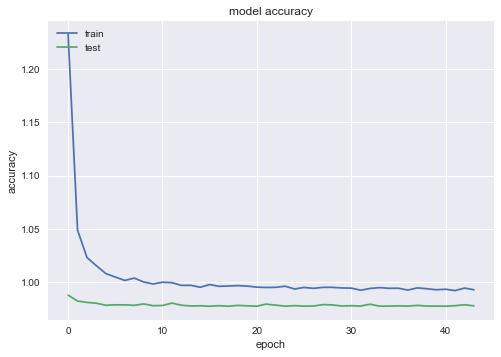

In [65]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
m.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[501209      0      0      0      0      0      0      0      0      0]
 [422498      0      0      0      0      0      0      0      0      0]
 [ 47622      0      0      0      0      0      0      0      0      0]
 [ 21121      0      0      0      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [  1424      0      0      0      0      0      0      0      0      0]
 [   230      0      0      0      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
50.1209
             precision    recall  f1-score   support

          0       0.50      1.00      0.67    501209
          1       0.00      0.00      0.00    422498
          2       0.00      0.00      0.00     47622
          3       0.00      0.00      0.00     2

In [46]:
train.columns

Index([u'CLASS', u'S1_1', u'S1_2', u'S1_3', u'S1_4', u'S2_1', u'S2_2', u'S2_3',
       u'S2_4', u'S3_1', u'S3_2', u'S3_3', u'S3_4', u'S4_1', u'S4_2', u'S4_3',
       u'S4_4', u'S5_1', u'S5_2', u'S5_3', u'S5_4', u'C1_1', u'C1_2', u'C1_3',
       u'C1_4', u'C1_5', u'C1_6', u'C1_7', u'C1_8', u'C1_9', u'C1_10',
       u'C1_11', u'C1_12', u'C1_13', u'C2_1', u'C2_2', u'C2_3', u'C2_4',
       u'C2_5', u'C2_6', u'C2_7', u'C2_8', u'C2_9', u'C2_10', u'C2_11',
       u'C2_12', u'C2_13', u'C3_1', u'C3_2', u'C3_3', u'C3_4', u'C3_5',
       u'C3_6', u'C3_7', u'C3_8', u'C3_9', u'C3_10', u'C3_11', u'C3_12',
       u'C3_13', u'C4_1', u'C4_2', u'C4_3', u'C4_4', u'C4_5', u'C4_6', u'C4_7',
       u'C4_8', u'C4_9', u'C4_10', u'C4_11', u'C4_12', u'C4_13', u'C5_1',
       u'C5_2', u'C5_3', u'C5_4', u'C5_5', u'C5_6', u'C5_7', u'C5_8', u'C5_9',
       u'C5_10', u'C5_11', u'C5_12', u'C5_13'],
      dtype='object')

In [47]:
len(train.columns)

86

In [63]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
import keras
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))
input_9 = Input(shape=(1,))
input_10 = Input(shape=(1,))
input_11= Input(shape=(1,))
input_12= Input(shape=(1,))
input_13= Input(shape=(1,))
input_14= Input(shape=(1,))
input_15= Input(shape=(1,))
input_16= Input(shape=(1,))

input_17= Input(shape=(1,))
input_18= Input(shape=(1,))
input_19= Input(shape=(1,))
input_20= Input(shape=(1,))
input_21= Input(shape=(1,))
input_22 = Input(shape=(1,))
input_23= Input(shape=(1,))
input_24= Input(shape=(1,))

input_25= Input(shape=(1,))
input_26= Input(shape=(1,))
input_27= Input(shape=(1,))
input_28= Input(shape=(1,))
input_29= Input(shape=(1,))
input_30= Input(shape=(1,))
input_31= Input(shape=(1,))
input_32= Input(shape=(1,))

input_33= Input(shape=(1,))
input_34= Input(shape=(1,))
input_35= Input(shape=(1,))
input_36= Input(shape=(1,))
input_37= Input(shape=(1,))
input_38= Input(shape=(1,))
input_39 = Input(shape=(1,))
input_40= Input(shape=(1,))

input_41 = Input(shape=(1,))
input_42 = Input(shape=(1,))
input_43 = Input(shape=(1,))
input_44 = Input(shape=(1,))
input_45 = Input(shape=(1,))
input_46 = Input(shape=(1,))
input_47 = Input(shape=(1,))
input_48 = Input(shape=(1,))
input_49 = Input(shape=(1,))
input_50 = Input(shape=(1,))

input_51 = Input(shape=(1,))
input_52 = Input(shape=(1,))
input_53 = Input(shape=(1,))
input_54 = Input(shape=(1,))
input_55 = Input(shape=(1,))
input_56 = Input(shape=(1,))
input_57 = Input(shape=(1,))
input_58 = Input(shape=(1,))
input_59 = Input(shape=(1,))
input_60 = Input(shape=(1,))
input_61= Input(shape=(1,))
input_62= Input(shape=(1,))
input_63= Input(shape=(1,))
input_64= Input(shape=(1,))
input_65= Input(shape=(1,))
input_66= Input(shape=(1,))

input_67= Input(shape=(1,))
input_68= Input(shape=(1,))
input_69= Input(shape=(1,))
input_70= Input(shape=(1,))
input_71= Input(shape=(1,))
input_72 = Input(shape=(1,))
input_73= Input(shape=(1,))
input_74= Input(shape=(1,))

input_75= Input(shape=(1,))
input_76= Input(shape=(1,))
input_77= Input(shape=(1,))
input_78= Input(shape=(1,))
input_79= Input(shape=(1,))
input_80= Input(shape=(1,))
input_81= Input(shape=(1,))
input_82= Input(shape=(1,))

input_83= Input(shape=(1,))
input_84= Input(shape=(1,))
input_85= Input(shape=(1,))








hidden_1 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)
hidden_9 = Dense(32, activation='sigmoid')(input_9)
hidden_10 = Dense(32, activation='sigmoid')(input_10)
hidden_11= Dense(32, activation='sigmoid')(input_11)
hidden_12 = Dense(32, activation='sigmoid')(input_12)
hidden_13 = Dense(32, activation='sigmoid')(input_13)
hidden_14 = Dense(32, activation='sigmoid')(input_14)
hidden_15 = Dense(32, activation='sigmoid')(input_15)
hidden_16 = Dense(32, activation='sigmoid')(input_16)
hidden_17 = Dense(32, activation='sigmoid')(input_17)
hidden_18 = Dense(32, activation='sigmoid')(input_18)
hidden_19 = Dense(32, activation='sigmoid')(input_19)
hidden_20 = Dense(32, activation='sigmoid')(input_20)

hidden_21 = Dense(32, activation='sigmoid')(input_21)
hidden_22 = Dense(32, activation='sigmoid')(input_22)
hidden_23 = Dense(32, activation='sigmoid')(input_23)
hidden_24 = Dense(32, activation='sigmoid')(input_24)
hidden_25 = Dense(32, activation='sigmoid')(input_25)
hidden_26 = Dense(32, activation='sigmoid')(input_26)
hidden_27 = Dense(32, activation='sigmoid')(input_27)
hidden_28 = Dense(32, activation='sigmoid')(input_28)
hidden_29 = Dense(32, activation='sigmoid')(input_29)
hidden_30 = Dense(32, activation='sigmoid')(input_30)
hidden_31 = Dense(32, activation='sigmoid')(input_31)
hidden_32 = Dense(32, activation='sigmoid')(input_32)
hidden_33 = Dense(32, activation='sigmoid')(input_33)
hidden_34 = Dense(32, activation='sigmoid')(input_34)
hidden_35 = Dense(32, activation='sigmoid')(input_35)
hidden_36 = Dense(32, activation='sigmoid')(input_36)
hidden_37 = Dense(32, activation='sigmoid')(input_37)
hidden_38 = Dense(32, activation='sigmoid')(input_38)
hidden_39 = Dense(32, activation='sigmoid')(input_39)
hidden_40 = Dense(32, activation='sigmoid')(input_40)
hidden_41 = Dense(32, activation='sigmoid')(input_41)
hidden_42 = Dense(32, activation='sigmoid')(input_42)
hidden_43 = Dense(32, activation='sigmoid')(input_43)
hidden_44 = Dense(32, activation='sigmoid')(input_44)
hidden_45 = Dense(32, activation='sigmoid')(input_45)
hidden_46 = Dense(32, activation='sigmoid')(input_46)
hidden_47 = Dense(32, activation='sigmoid')(input_47)
hidden_48 = Dense(32, activation='sigmoid')(input_48)
hidden_49 = Dense(32, activation='sigmoid')(input_49)
hidden_50 = Dense(32, activation='sigmoid')(input_50)
hidden_51 = Dense(32, activation='sigmoid')(input_51)
hidden_52 = Dense(32, activation='sigmoid')(input_52)
hidden_53 = Dense(32, activation='sigmoid')(input_53)
hidden_54 = Dense(32, activation='sigmoid')(input_54)
hidden_55 = Dense(32, activation='sigmoid')(input_55)
hidden_56 = Dense(32, activation='sigmoid')(input_56)
hidden_57 = Dense(32, activation='sigmoid')(input_57)
hidden_58 = Dense(32, activation='sigmoid')(input_58)
hidden_59 = Dense(32, activation='sigmoid')(input_59)
hidden_60 = Dense(32, activation='sigmoid')(input_60)
hidden_61= Dense(32, activation='sigmoid')(input_61)
hidden_62 = Dense(32, activation='sigmoid')(input_62)
hidden_63 = Dense(32, activation='sigmoid')(input_63)
hidden_64 = Dense(32, activation='sigmoid')(input_64)
hidden_65 = Dense(32, activation='sigmoid')(input_65)
hidden_66 = Dense(32, activation='sigmoid')(input_66)
hidden_67 = Dense(32, activation='sigmoid')(input_67)
hidden_68 = Dense(32, activation='sigmoid')(input_68)
hidden_69 = Dense(32, activation='sigmoid')(input_69)
hidden_70 = Dense(32, activation='sigmoid')(input_70)

hidden_71 = Dense(32, activation='sigmoid')(input_71)
hidden_72 = Dense(32, activation='sigmoid')(input_72)
hidden_73 = Dense(32, activation='sigmoid')(input_73)
hidden_74 = Dense(32, activation='sigmoid')(input_74)
hidden_75 = Dense(32, activation='sigmoid')(input_75)
hidden_76 = Dense(32, activation='sigmoid')(input_76)
hidden_77 = Dense(32, activation='sigmoid')(input_77)
hidden_78 = Dense(32, activation='sigmoid')(input_78)
hidden_79 = Dense(32, activation='sigmoid')(input_79)
hidden_80 = Dense(32, activation='sigmoid')(input_80)
hidden_81 = Dense(32, activation='sigmoid')(input_81)
hidden_82 = Dense(32, activation='sigmoid')(input_82)
hidden_83 = Dense(32, activation='sigmoid')(input_83)
hidden_84 = Dense(32, activation='sigmoid')(input_84)
hidden_85 = Dense(32, activation='sigmoid')(input_85)






value_list=[X_train[['S1_1']].values,
            X_train[['S1_2']].values,
            X_train[['S1_3']].values,
            X_train[['S1_4']].values,
            X_train[['S2_1']].values,
            X_train[['S2_2']].values,
            X_train[['S2_3']].values,
            X_train[['S2_4']].values,
            X_train[['S3_1']].values,
            X_train[['S3_2']].values,
            X_train[['S3_3']].values,
            X_train[['S3_4']].values,
            X_train[['S4_1']].values,
            X_train[['S4_2']].values,
            X_train[['S4_3']].values,
            X_train[['S4_4']].values,
            X_train[['S5_1']].values,
            X_train[['S5_2']].values,
            X_train[['S5_3']].values,
            X_train[['S5_4']].values,
            X_train[['C1_1']].values,
            X_train[['C1_2']].values,
            X_train[['C1_3']].values,
            X_train[['C1_4']].values,
            X_train[['C1_5']].values,
            X_train[['C1_6']].values,
            X_train[['C1_7']].values,
            X_train[['C1_8']].values,
            X_train[['C1_9']].values,
            X_train[['C1_10']].values,
            X_train[['C1_11']].values,
            X_train[['C1_12']].values,
            X_train[['C1_13']].values,
            X_train[['C2_1']].values,
            X_train[['C2_2']].values,
            X_train[['C2_3']].values,
            X_train[['C2_4']].values,
            X_train[['C2_5']].values,
            X_train[['C2_6']].values,
            X_train[['C2_7']].values,
            X_train[['C2_8']].values,
            X_train[['C2_9']].values,
            X_train[['C2_10']].values,
            X_train[['C2_11']].values,
            X_train[['C2_12']].values,
            X_train[['C2_13']].values,
            X_train[['C3_1']].values,
            X_train[['C3_2']].values,
            X_train[['C3_3']].values,
            X_train[['C3_4']].values,
            X_train[['C3_5']].values,
            X_train[['C3_6']].values,
            X_train[['C3_7']].values,
            X_train[['C3_8']].values,
            X_train[['C3_9']].values,
            X_train[['C3_10']].values,
            X_train[['C3_11']].values,
            X_train[['C3_12']].values,
            X_train[['C3_13']].values,
            X_train[['C4_1']].values,
            X_train[['C4_2']].values,
            X_train[['C4_3']].values,
            X_train[['C4_4']].values,
            X_train[['C4_5']].values,
            X_train[['C4_6']].values,
            X_train[['C4_7']].values,
            X_train[['C4_8']].values,
            X_train[['C4_9']].values,
            X_train[['C4_10']].values,
            X_train[['C4_11']].values,
            X_train[['C4_12']].values,
            X_train[['C4_13']].values,
            X_train[['C5_1']].values,
            X_train[['C5_2']].values,
            X_train[['C5_3']].values,
            X_train[['C5_4']].values,
            X_train[['C5_5']].values,
            X_train[['C5_6']].values,
            X_train[['C5_7']].values,
            X_train[['C5_8']].values,
            X_train[['C5_9']].values,
            X_train[['C5_10']].values,
            X_train[['C5_11']].values,
            X_train[['C5_12']].values,
            X_train[['C5_13']].values,
            
           ]

value_list_test=[X_test[['S1_1']].values,
            X_test[['S1_2']].values,
            X_test[['S1_3']].values,
            X_test[['S1_4']].values,
            X_test[['S2_1']].values,
            X_test[['S2_2']].values,
            X_test[['S2_3']].values,
            X_test[['S2_4']].values,
            X_test[['S3_1']].values,
            X_test[['S3_2']].values,
            X_test[['S3_3']].values,
            X_test[['S3_4']].values,
            X_test[['S4_1']].values,
            X_test[['S4_2']].values,
            X_test[['S4_3']].values,
            X_test[['S4_4']].values,
            X_test[['S5_1']].values,
            X_test[['S5_2']].values,
            X_test[['S5_3']].values,
            X_test[['S5_4']].values,
            X_test[['C1_1']].values,
            X_test[['C1_2']].values,
            X_test[['C1_3']].values,
            X_test[['C1_4']].values,
            X_test[['C1_5']].values,
            X_test[['C1_6']].values,
            X_test[['C1_7']].values,
            X_test[['C1_8']].values,
            X_test[['C1_9']].values,
            X_test[['C1_10']].values,
            X_test[['C1_11']].values,
            X_test[['C1_12']].values,
            X_test[['C1_13']].values,
            X_test[['C2_1']].values,
            X_test[['C2_2']].values,
            X_test[['C2_3']].values,
            X_test[['C2_4']].values,
            X_test[['C2_5']].values,
            X_test[['C2_6']].values,
            X_test[['C2_7']].values,
            X_test[['C2_8']].values,
            X_test[['C2_9']].values,
            X_test[['C2_10']].values,
            X_test[['C2_11']].values,
            X_test[['C2_12']].values,
            X_test[['C2_13']].values,
            X_test[['C3_1']].values,
            X_test[['C3_2']].values,
            X_test[['C3_3']].values,
            X_test[['C3_4']].values,
            X_test[['C3_5']].values,
            X_test[['C3_6']].values,
            X_train[['C3_7']].values,
            X_test[['C3_8']].values,
            X_test[['C3_9']].values,
            X_test[['C3_10']].values,
            X_test[['C3_11']].values,
            X_test[['C3_12']].values,
            X_test[['C3_13']].values,
            X_test[['C4_1']].values,
            X_test[['C4_2']].values,
            X_test[['C4_3']].values,
            X_test[['C4_4']].values,
            X_test[['C4_5']].values,
            X_test[['C4_6']].values,
            X_test[['C4_7']].values,
            X_test[['C4_8']].values,
            X_test[['C4_9']].values,
            X_test[['C4_10']].values,
            X_test[['C4_11']].values,
            X_test[['C4_12']].values,
            X_test[['C4_13']].values,
            X_test[['C5_1']].values,
            X_test[['C5_2']].values,
            X_test[['C5_3']].values,
            X_test[['C5_4']].values,
            X_test[['C5_5']].values,
            X_test[['C5_6']].values,
            X_test[['C5_7']].values,
            X_test[['C5_8']].values,
            X_test[['C5_9']].values,
            X_test[['C5_10']].values,
            X_test[['C5_11']].values,
            X_test[['C5_12']].values,
            X_test[['C5_13']].values,
            
           ]

x = keras.layers.concatenate([hidden_1,hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,hidden_7,hidden_8,
                             hidden_9,hidden_10,hidden_11,hidden_12,hidden_13,hidden_14,hidden_15,hidden_16,
                             hidden_17,hidden_18,hidden_19,hidden_20,hidden_21,hidden_22,hidden_23,hidden_24,
                             hidden_25,hidden_26,hidden_27,hidden_28,hidden_29,hidden_30,hidden_31,hidden_32,
                             hidden_33,hidden_34,hidden_35,hidden_36,hidden_37,hidden_38,hidden_39,hidden_40,
                             hidden_41,hidden_42,hidden_43,hidden_44,hidden_45,hidden_46,hidden_47,hidden_48,
                             hidden_49,hidden_50,
                             hidden_51,hidden_52,hidden_53,hidden_54,hidden_55,hidden_56,hidden_57,hidden_58,
                             hidden_59,hidden_60,hidden_61,hidden_62,hidden_63,hidden_64,hidden_65,hidden_66,
                             hidden_67,hidden_68,hidden_69,hidden_70,hidden_71,hidden_72,hidden_72,hidden_73,
                             hidden_74,hidden_75,hidden_76,hidden_77,hidden_78,hidden_79,hidden_80,hidden_81,
                             hidden_82,hidden_83,hidden_84,hidden_85])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,
                     input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,
                     input_17,input_18,input_19,input_20,input_21,input_22,input_23,input_24,
                     input_25,input_26,input_27,input_28,input_29,input_30,input_31,input_32,
                     input_33,input_34,input_35,input_36,input_37,input_38,input_39,input_40,
                     input_41,input_42,input_43,input_44,input_45,input_46,input_47,input_48,
                     input_49,input_50,
                     input_51,input_52,input_53,input_54,input_55,input_56,input_57,input_58,
                     input_59,input_60,input_61,input_62,input_63,input_64,input_65,input_66,
                     input_67,input_68,input_69,input_70,input_71,input_72,input_73,input_74,
                     input_75,input_76,input_77,input_78,input_79,input_80,input_81,input_82,
                     input_83,input_84,input_85], outputs=[output])
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    # Feature matrix
    value_list, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=32, 
)

Train on 22509 samples, validate on 2501 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.98099, saving model to best.model
9s - loss: 0.9923 - acc: 0.4918 - val_loss: 0.9810 - val_acc: 0.4986
Epoch 2/200
Epoch 00001: val_loss improved from 0.98099 to 0.97947, saving model to best.model
9s - loss: 0.9896 - acc: 0.4925 - val_loss: 0.9795 - val_acc: 0.4986
Epoch 3/200
Epoch 00002: val_loss improved from 0.97947 to 0.97723, saving model to best.model
9s - loss: 0.9901 - acc: 0.4889 - val_loss: 0.9772 - val_acc: 0.4986
Epoch 4/200
Epoch 00003: val_loss did not improve
9s - loss: 0.9899 - acc: 0.4932 - val_loss: 0.9788 - val_acc: 0.4986
Epoch 5/200
Epoch 00004: val_loss did not improve
9s - loss: 0.9898 - acc: 0.4929 - val_loss: 0.9786 - val_acc: 0.4986
Epoch 6/200
Epoch 00005: val_loss did not improve
9s - loss: 0.9898 - acc: 0.4918 - val_loss: 0.9802 - val_acc: 0.4986
Epoch 7/200
Epoch 00006: val_loss did not improve
9s - loss: 0.9898 - acc: 0.4909 - val_loss: 0.9791 - val

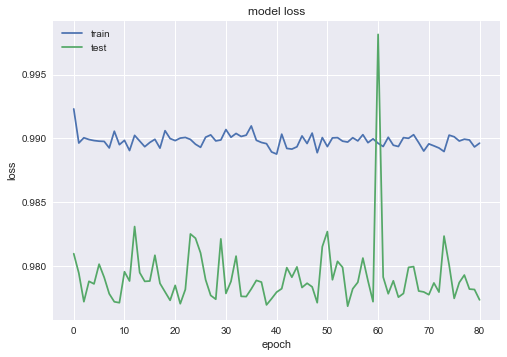

In [64]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
m.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[410425  90784      0      0      0      0      0      0      0      0]
 [266540 155958      0      0      0      0      0      0      0      0]
 [ 23658  23964      0      0      0      0      0      0      0      0]
 [  7252  13869      0      0      0      0      0      0      0      0]
 [    69   3816      0      0      0      0      0      0      0      0]
 [  1679    317      0      0      0      0      0      0      0      0]
 [   436    988      0      0      0      0      0      0      0      0]
 [    19    211      0      0      0      0      0      0      0      0]
 [     0     12      0      0      0      0      0      0      0      0]
 [     1      2      0      0      0      0      0      0      0      0]]
56.6383
             precision    recall  f1-score   support

          0       0.58      0.82      0.68    501209
          1       0.54      0.37      0.44    422498
          2       0.00      0.00      0.00     47622
          3       0.00      0.00      0.00     2